<a href="https://colab.research.google.com/github/akdspw/006958/blob/master/%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC_%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D%EA%B3%BC_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# connect to Google Drive
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프에서 한글표현을 위해 폰트를 설치
%config lnlineBackend.figure_format = 'retina' # 폰트가 깨끗하게 보이도록 설정
!apt-get -qq -y install fonts-nanum > /dev/null # 나눔 폰트 설치


In [44]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
mpl.pyplot.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

In [45]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1==0.7.4
!pip install rhinoMorph

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ 

# 빈도 분석

In [46]:
# 경로 변경
# !cd /content/drive/My Drive/Colab Notebooks/code/project/nlp
%cd /content/drive/My\ Drive/Colab\ Notebooks/code/project/nlp

/content/drive/My Drive/Colab Notebooks/code/project/nlp


In [47]:
ls

201121_konlpy.ipynb


In [48]:
pip install konlpy

In [49]:

# konlpy 패키지 불러오기
from konlpy.corpus import kolaw

# 예제파일 불러오기
c = kolaw.open('constitution.txt').read()

In [50]:

#가져온 데이터의 type을 확인
print(type(c))

# 길이 확인
print(len(c))

# ~600자 출력
print(c[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [51]:

# 패키지 불러오기
import nltk
nltk.download('punkt')

# 문장단위(sent)로 tokenize
from nltk.tokenize import sent_tokenize
c_sent = sent_tokenize(c)
print(len(c_sent))
print(c_sent[:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
357
['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.', '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.', '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.', '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.', '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.']


In [52]:
# 단어단위(word)로 tokenize
from nltk.tokenize import word_tokenize
c_words = word_tokenize(c)
len(c_words)

4640

In [53]:
# tokenize한 단어 사이에 공백(띄어쓰기) 추가
" ".join(c_words[:50])

'대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고 , 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고 , 모든 사회적 폐습과 불의를 타파하며 , 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히'

In [54]:

# 패키지 불러오기
from konlpy.tag import Okt
okt = Okt()
tokens_c = okt.morphs(c) # 형태소 단위로 tokenize

In [55]:
len(tokens_c)

8796

In [56]:
type(tokens_c)

list

In [57]:

" ".join(tokens_c[:50])

'대한민국 헌법 \n\n 유구 한 역사 와 전통 에 빛나는 우리 대 한 국민 은 3 · 1 운동 으로 건립 된 대한민국 임시정부 의 법 통과 불의 에 항거 한 4 · 19 민주 이념 을 계승 하고 , 조국 의 민주 개혁 과 평화 적 통일 의 사명'

In [58]:
import nltk
c_nltk_text = nltk.Text(tokens_c, name = "대한민국헌법") 
c_nltk_text

<Text: 대한민국헌법>

In [59]:
# 모든 단어의 수
print(len(c_nltk_text.tokens))

# 서로 다른 단어의 수
print(len(set(c_nltk_text.tokens)))

8796
1364


In [60]:
#단어와 단어의 빈도를 dictionary 형태로 표현 
c_nltk_text.vocab()

FreqDist({'대한민국': 11,
          '헌법': 53,
          '\n\n': 2,
          '유구': 1,
          '한': 101,
          '역사': 1,
          '와': 41,
          '전통': 1,
          '에': 282,
          '빛나는': 1,
          '우리': 3,
          '대': 1,
          '국민': 61,
          '은': 179,
          '3': 14,
          '·': 145,
          '1': 25,
          '운동': 2,
          '으로': 52,
          '건립': 1,
          '된': 30,
          '임시정부': 1,
          '의': 380,
          '법': 3,
          '통과': 1,
          '불의': 2,
          '항거': 1,
          '4': 8,
          '19': 1,
          '민주': 6,
          '이념': 1,
          '을': 211,
          '계승': 2,
          '하고': 19,
          ',': 101,
          '조국': 3,
          '개혁': 1,
          '과': 82,
          '평화': 6,
          '적': 35,
          '통일': 6,
          '사명': 2,
          '입': 1,
          '각하': 1,
          '여': 10,
          '정의': 1,
          '인도': 1,
          '동포': 1,
          '애': 1,
          '로써': 5,
          '민족': 3,
          '단결': 1

In [61]:
# 시각화를 위해 matplotlib 패키지 불러오기
from matplotlib import font_manager, rc


# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/malgun.ttf").get_name()
rc('font', family=font_name)

FileNotFoundError: ignored

In [62]:
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

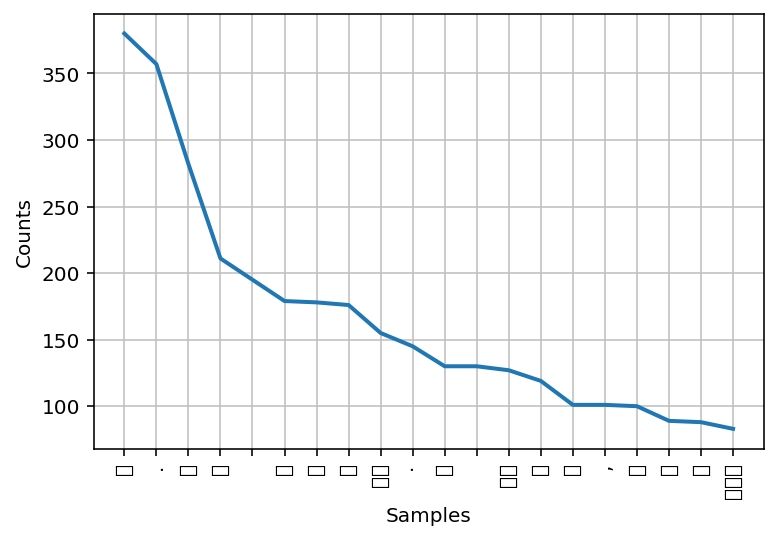

In [63]:

# 상위 빈도 단어들의 빈도를 그래프로 출력
%matplotlib inline
c_nltk_text.plot(20)

In [ ]:

tokens_new = [] # 리스트 생성
for token in tokens_c:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        tokens_new.append(token.strip()) # 추출한 단어들 tokens_new 리스트에 추가
print(len(tokens_new))

In [ ]:
# 수정한 리스트를 바탕으로 그래프 다시 그리기
c_nltk_text = nltk.Text(tokens_new, name = "대한민국헌법")
c_nltk_text.plot(20)

In [ ]:
# "대한민국"의 빈도 구하기
c_nltk_text.count('대한민국')

In [ ]:
# 단어들 중 주어진 단어들의 위치를 표시
c_nltk_text.dispersion_plot(['대한민국', '민주', '헌법'])

In [ ]:
nc = okt.nouns(c) # 데이터에서 명사만 추출
print(len(nc))
print(" ".join(nc[:50]))

In [ ]:

ncnt = nltk.Text(nc, name = "Okt명사")
ncnt.plot(20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

In [ ]:
import keras
data_path = '/content/drive/My Drive/Colab Notebooks/data/data.csv'

In [ ]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg   # nltk.corpus의 서브패키지 사용
files_en = gutenberg.fileids() # 파일 목록
doc_en = gutenberg.open(data_path).read() # 원하는 데이터 불러오기

In [ ]:
from wordcloud import WordCloud

# 워드클라우드 이미지 생성
wordcloud = WordCloud().generate(doc_en)

# matplotlib 패키지 이용해서 생성한 워드클라우드(이미지) 출력
import matplotlib.pyplot as plt
%matplotlib inline

# plt.imshow: 이미지 출력 함수
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# 최대 폰트 크기 줄이고 다시 출력
wordcloud = WordCloud(max_font_size=40).generate(doc_en)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# text 파일로부터 읽어들여 워드클라우드 그리기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
font_path = 'c:/Windows/Fonts/malgun.ttf' # 한글 폰트의 위치를 지정

# 폰트 및 다른 속성들을 지정
wordcloud = WordCloud( 
    font_path = font_path,
    width = 800,
    height = 800, 
    max_words=50,
    background_color='white' # 영어와 달리 배경을 흰색으로
)

text=open('test2.txt').read() # 텍스트 파일을 읽음
wordcloud = wordcloud.generate(text) # 워드 클라우드 생성
 
fig = plt.figure(figsize=(12,12)) # 그림판 크기를 지정
plt.imshow(wordcloud)
plt.axis("off")
plt.show()